In [1]:
#zadanie 1

def lagrange (x_tab, y_tab):
    def f(x):
        l = len(x_tab)
        y=0
        for i in range (l):
            t=1
            for j in range (l):
                if i != j :
                    t*=((x-x_tab[j])/(x_tab[i]-x_tab[j]))
            y+=t*y_tab[i]
        return y
    return f

x_t=[2,3,10]
y_t=[0,2,1]
x=5

l=lagrange(x_t, y_t)
print (l(x))

4.392857142857142


[ 1.74443895e-02  2.63561921e-13 -3.63353005e-01 -5.53719645e-12
  3.24697744e+00  4.86728056e-11 -1.62697281e+01 -2.32090632e-10
  5.01463764e+01  6.51394400e-10 -9.81539591e+01 -1.09151807e-09
  1.21668167e+02  1.05516292e-09 -9.24799205e+01 -5.34637064e-10
  4.03309987e+01  1.14791859e-10 -9.01212202e+00 -7.00549170e-12
  8.82903000e-01]


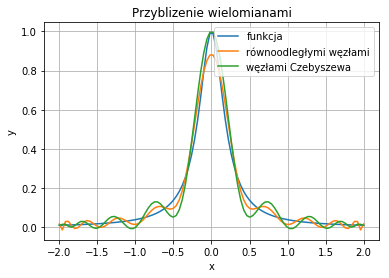

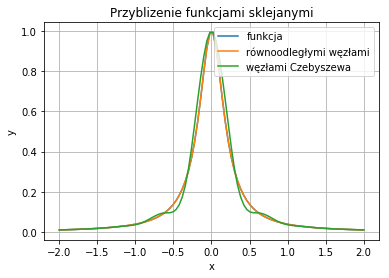

Metoda funkcji sklejanych okazała się lepsza w tym przypadku
Obserwujemy efekt Rungego na krańcach przedziału, użycie przedziałów Czebyszewa pozwala w pewnym stopniu je zminimalizować


In [19]:
#zadanie 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math


def f(x):
    return 1/(25*x**2+1)

def wezly_cz(n):
    wezly=[]
    for i in range (n):
        w_i=-math.cos(i*math.pi/(n-1))
        wezly.append(w_i)
    return wezly

def wielomian(lista):
    def f(x):
        r = 0
        for a in lista:
            r = r * x + a
        return r
    return f

##########################################
# wielomianem

# rownoodległe

x=np.linspace(-2,2,100)
y1=f(x)
poli_rowne=np.polyfit(x,y1,20)
print(poli_rowne)

f_rowne=wielomian(poli_rowne)

# równe wezly
wezly=wezly_cz(21)
y2=21*[0]
for i in range(len(wezly)):
    wezly[i]*=2
    y2[i]=f(wezly[i])
poli_wezly=np.polyfit(wezly,y2,20)
f_wezly=wielomian(poli_wezly)

#rysowanie
x=np.linspace(-2,2, 100)
y=[]
y1=[]
y2=[]
for i in x:
    y.append(f(i))
    y1.append(f_rowne(i))
    y2.append(f_wezly(i))

    
plt.title('Przyblizenie wielomianami')
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['funkcja','równoodległymi węzłami','węzłami Czebyszewa'])
plt.show()

###################################################################
# funkcjami sklejanymi

# rownoodległe
x=np.linspace(-2,2,100)
y1=f(x)
sklejane_rowne=interpolate.interp1d(x,y1,'cubic') 

# równe wezly
wezly=wezly_cz(21)
y2=21*[0]
for i in range(len(wezly)):
    wezly[i]*=2
    y2[i]=f(wezly[i])
sklejane_wezly=interpolate.interp1d(wezly,y2,'cubic') 

#rysowanie
x=np.linspace(-2,2, 100)
y=[]
y1=[]
y2=[]
for i in x:
    y.append(f(i))
    y1.append(sklejane_rowne(i))
    y2.append(sklejane_wezly(i))

    
plt.title('Przyblizenie funkcjami sklejanymi')
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['funkcja','równoodległymi węzłami','węzłami Czebyszewa'])
plt.show()

print("Metoda funkcji sklejanych okazała się lepsza w tym przypadku")
print("Obserwujemy efekt Rungego na krańcach przedziału, użycie przedziałów Czebyszewa pozwala w pewnym stopniu je zminimalizować")




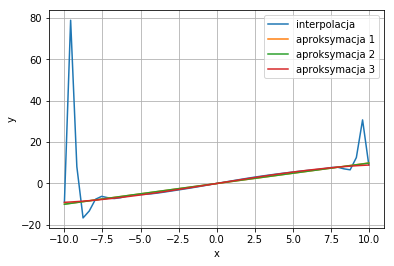

In [3]:
#zadanie 3

v=list(range(-10,11))
w=[-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02]

lg=lagrange(v,w)
poli_list=[]
for i in range (1,4):
    poli_list.append(np.polyfit(v,w,i))
    
    
fun_list=[lg]
for i in range (1,4):
    fun_list.append(wielomian(poli_list[i-1]))
    
x=np.linspace(-10,10)
y=[[],[],[],[]]
for i in x:
    for f in range(len(fun_list)):
        y[f].append(fun_list[f](i))
        
for f in y:
    plt.plot(x,f)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['interpolacja', 'aproksymacja 1', 'aproksymacja 2','aproksymacja 3'])
plt.show()
        
    


In [4]:
#zadanie 4

import scipy.misc as mc

t=[0,1,2,3]
s=[0, 42.7, 73.2, 92.5]


lg1=lagrange(s,t)
l=lg1(79.6)

lg2=lagrange(t,s)
v=mc.derivative(lg2,l)

print("Czas: ", l)
print("Predkosc: ", v)



Czas:  2.2916950833167666
Predkosc:  21.6755580776678
